In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../Data/pollution_data.csv")

In [3]:
df.head()

,Year,State,CO,NO2,SO2,O3,PM2.5
0,2002,Alabama,0.671517,5.865513,2.353650,0.044876,14.086733
1,2002,Arizona,0.891101,19.402168,3.720999,0.050519,9.746759
2,2002,Arkansas,0.595566,15.662020,2.640052,0.043574,11.810577
3,2002,California,0.599614,16.339366,1.606644,0.044603,14.396674
4,2002,Colorado,0.706515,16.664983,3.119088,0.050209,8.187605


**Dataset Description:**

The dataset contains information related to air quality and its potential impact on respiratory health. It includes the following parameters:

1. `Year`: This column represents the year of data collection. It is a categorical variable that indicates the year in which the data was recorded.

2. `State`: This column represents the state in the United States where the data was collected. It is a categorical variable and indicates the geographical location within the United States.

3. `CO`: This column represents the concentration of carbon monoxide (CO) in the air. It is a numerical variable and is typically measured in parts per million (ppm). CO is a common air pollutant and can have adverse effects on respiratory health.

4. `NO2`: This column represents the concentration of nitrogen dioxide (NO2) in the air. It is a numerical variable and is also typically measured in parts per million (ppm). NO2 is a major air pollutant and can have negative health effects, particularly on the respiratory system.

5. `O3`: This column represents the concentration of ozone (O3) in the air. It is a numerical variable and is measured in parts per million (ppm). Ozone is a common component of smog and can affect respiratory health, especially at high concentrations.

6. `PM2.5`: This column represents the concentration of fine particulate matter with a diameter of 2.5 micrometers or smaller (PM2.5) in the air. It is a numerical variable and is measured in micrograms per cubic meter (µg/m³). PM2.5 is a significant air pollutant known to be harmful to respiratory health.

7. `SO2`: This column represents the concentration of sulfur dioxide (SO2) in the air. It is a numerical variable and is typically measured in parts per million (ppm). SO2 is a harmful air pollutant, especially to individuals with respiratory conditions.

8. `Deaths`: This column represents the number of deaths due to **respiratory diseases** in the corresponding state and year. It is a numerical variable that indicates the impact of air pollutants on public health, particularly in terms of respiratory-related mortality.

This dataset provides valuable information for researchers and policymakers interested in understanding the relationships between air quality and public health, with a specific focus on respiratory health outcomes.


In [4]:
df.describe()

,Year,CO,NO2,SO2,O3,PM2.5
count,1029.000000,1012.000000,982.000000,1026.000000,1029.000000,1017.000000
mean,2012.000000,0.347060,9.153732,1.708990,0.043381,9.111700
std,6.058245,0.160955,4.261520,1.490680,0.004438,2.410944
min,2002.000000,-0.016876,0.842678,0.013636,0.031432,3.609712
25%,2007.000000,0.233822,6.418307,0.645160,0.040149,7.424129
50%,2012.000000,0.309581,8.675831,1.217166,0.042897,8.686415
75%,2017.000000,0.420619,11.432499,2.370526,0.046545,10.455864
max,2022.000000,1.087352,24.928178,9.794401,0.057918,16.632545


In [5]:
df.dtypes

Year       int64
State     object
CO       float64
NO2      float64
SO2      float64
O3       float64
PM2.5    float64
dtype: object

In [6]:
df.isnull().sum()

Year      0
State     0
CO       17
NO2      47
SO2       3
O3        0
PM2.5    12
dtype: int64

In [7]:
df.shape

(1029, 7)

In [8]:
df["Year"].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

Exploratory Data Analysis


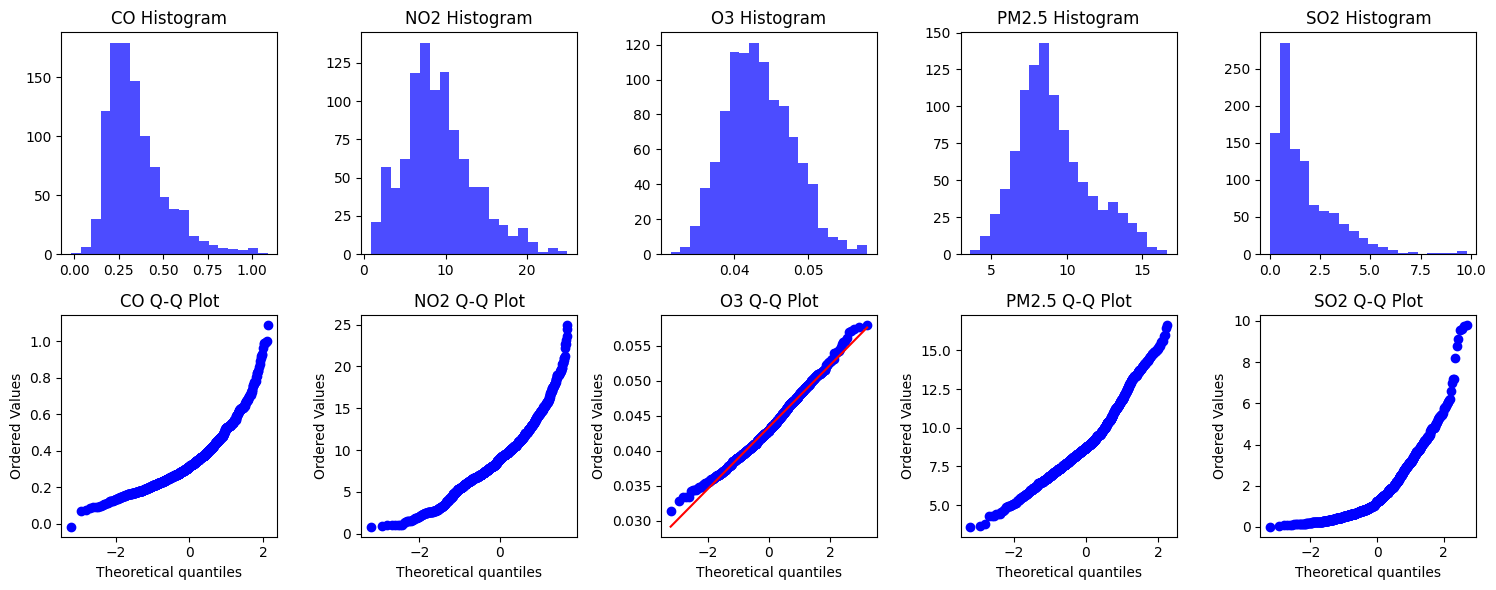

CO is normally distributed (p-value: nan)
NO2 is normally distributed (p-value: nan)
O3 is not normally distributed (p-value: 4.091285573938172e-05)
PM2.5 is normally distributed (p-value: nan)
SO2 is normally distributed (p-value: nan)


In [9]:
# Univarite Analysis
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Extract the data for each variable
co = df["CO"]
no2 = df["NO2"]
o3 = df["O3"]
pm25 = df["PM2.5"]
so2 = df["SO2"]

# Create a list of variable names for plotting and analysis
variables = [co, no2, o3, pm25, so2]
var_names = ["CO", "NO2", "O3", "PM2.5", "SO2"]

# Set up subplots for the histograms and Q-Q plots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

# Loop through each variable for analysis
for i in range(len(variables)):
    # Histogram
    axes[0, i].hist(variables[i], bins=20, color="blue", alpha=0.7)
    axes[0, i].set_title(f"{var_names[i]} Histogram")

    # Q-Q Plot
    stats.probplot(variables[i], dist="norm", plot=axes[1, i])
    axes[1, i].set_title(f"{var_names[i]} Q-Q Plot")

plt.tight_layout()
plt.show()

# Perform normality tests
for i in range(len(variables)):
    variable_name = var_names[i]
    p_value = stats.normaltest(variables[i]).pvalue
    if p_value < 0.05:
        print(f"{variable_name} is not normally distributed (p-value: {p_value})")
    else:
        print(f"{variable_name} is normally distributed (p-value: {p_value})")

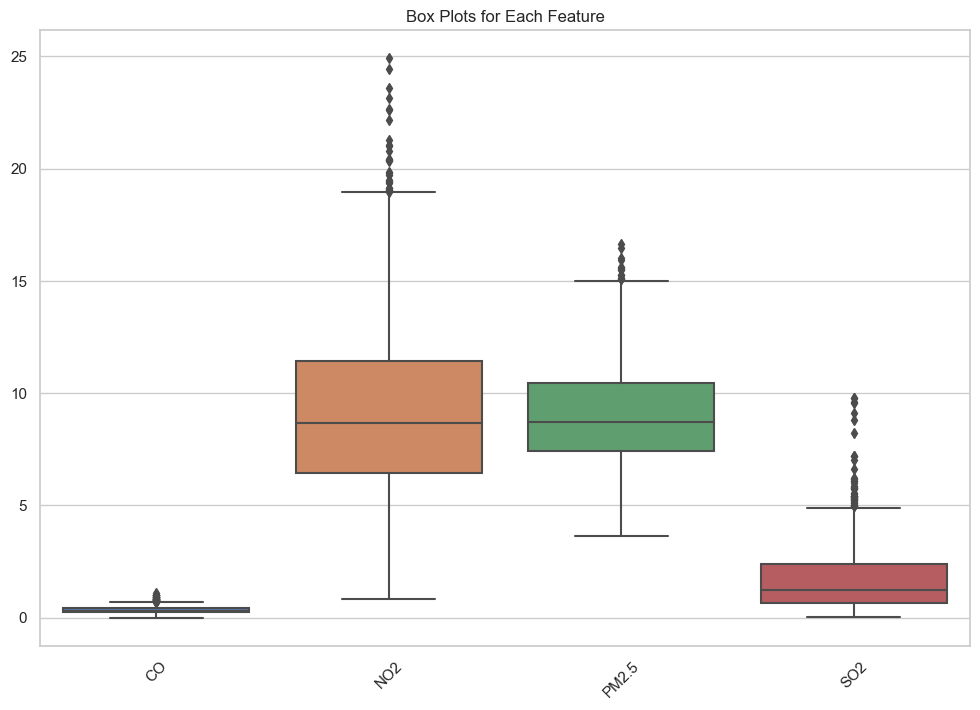

In [10]:
# Set the style of the plot (optional)
sn.set(style="whitegrid")

# Create a box plot for each relevant column
plt.figure(figsize=(12, 8))  # Set the figure size
sn.boxplot(data=df[["CO", "NO2", "PM2.5", "SO2"]])
plt.title("Box Plots for Each Feature")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

In [11]:
import numpy as np

df["CO"] = np.log(df["CO"])
df["NO2"] = np.log(df["NO2"])
df["PM2.5"] = np.log(df["PM2.5"])
df["SO2"] = np.log(df["SO2"])
df["O3"] = np.log(df["O3"])

In [12]:
df.head()

,Year,State,CO,NO2,SO2,O3,PM2.5
0,2002,Alabama,-0.398217,1.769090,0.855967,-3.103847,2.645233
1,2002,Arizona,-0.115297,2.965385,1.313992,-2.985399,2.276935
2,2002,Arkansas,-0.518243,2.751239,0.970798,-3.133295,2.468995
3,2002,California,-0.511469,2.793577,0.474148,-3.109956,2.666997
4,2002,Colorado,-0.347411,2.813310,1.137541,-2.991553,2.102621


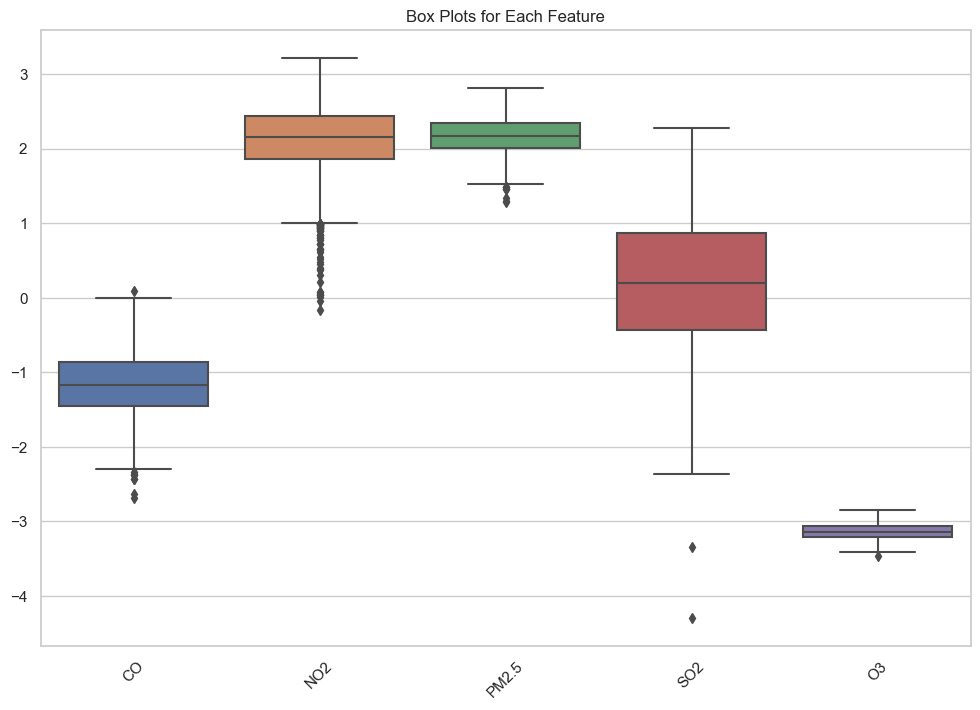

In [13]:
# Set the style of the plot (optional)
sn.set(style="whitegrid")

# Create a box plot for each relevant column
plt.figure(figsize=(12, 8))  # Set the figure size
sn.boxplot(data=df[["CO", "NO2", "PM2.5", "SO2", "O3"]])
plt.title("Box Plots for Each Feature")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

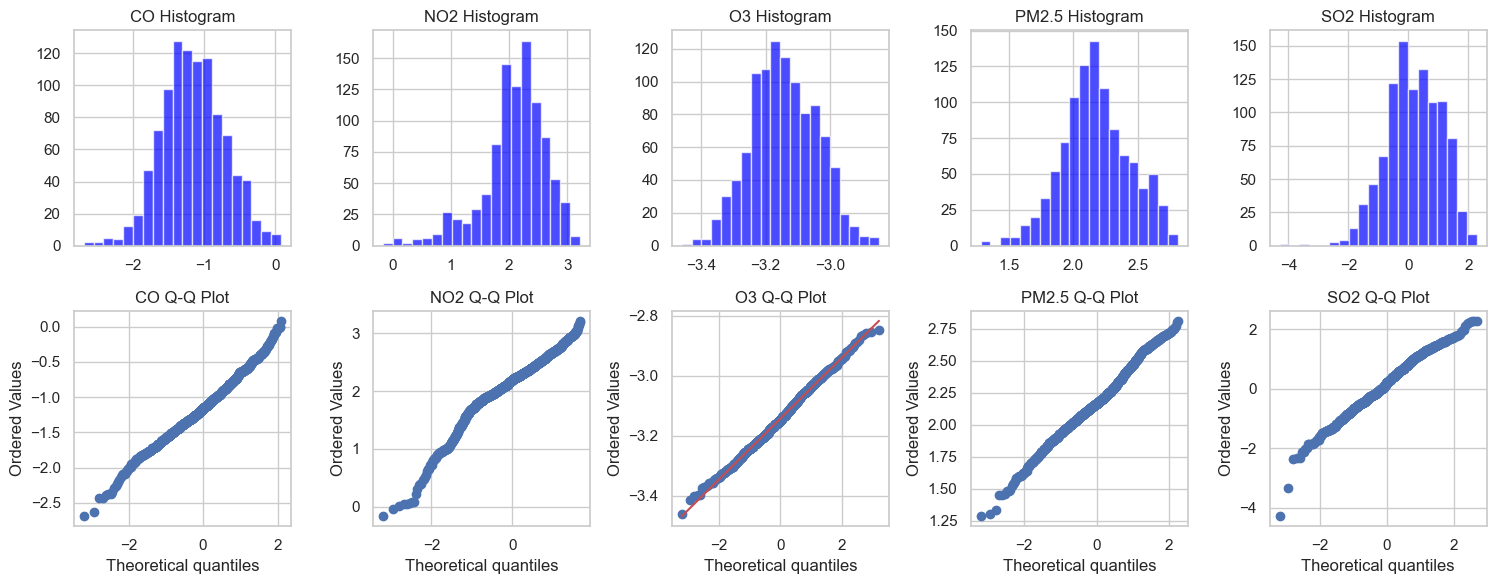

CO is normally distributed (p-value: nan)
NO2 is normally distributed (p-value: nan)
O3 is normally distributed (p-value: 0.053660966897871754)
PM2.5 is normally distributed (p-value: nan)
SO2 is normally distributed (p-value: nan)


In [14]:
# Univarite Analysis
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Extract the data for each variable
co = df["CO"]
no2 = df["NO2"]
o3 = df["O3"]
pm25 = df["PM2.5"]
so2 = df["SO2"]

# Create a list of variable names for plotting and analysis
variables = [co, no2, o3, pm25, so2]
var_names = ["CO", "NO2", "O3", "PM2.5", "SO2"]

# Set up subplots for the histograms and Q-Q plots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

# Loop through each variable for analysis
for i in range(len(variables)):
    # Histogram
    axes[0, i].hist(variables[i], bins=20, color="blue", alpha=0.7)
    axes[0, i].set_title(f"{var_names[i]} Histogram")

    # Q-Q Plot
    stats.probplot(variables[i], dist="norm", plot=axes[1, i])
    axes[1, i].set_title(f"{var_names[i]} Q-Q Plot")

plt.tight_layout()
plt.show()

# Perform normality tests
for i in range(len(variables)):
    variable_name = var_names[i]
    p_value = stats.normaltest(variables[i]).pvalue
    if p_value < 0.05:
        print(f"{variable_name} is not normally distributed (p-value: {p_value})")
    else:
        print(f"{variable_name} is normally distributed (p-value: {p_value})")

In [15]:
df.head()

,Year,State,CO,NO2,SO2,O3,PM2.5
0,2002,Alabama,-0.398217,1.769090,0.855967,-3.103847,2.645233
1,2002,Arizona,-0.115297,2.965385,1.313992,-2.985399,2.276935
2,2002,Arkansas,-0.518243,2.751239,0.970798,-3.133295,2.468995
3,2002,California,-0.511469,2.793577,0.474148,-3.109956,2.666997
4,2002,Colorado,-0.347411,2.813310,1.137541,-2.991553,2.102621


In [16]:
# Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the independent variables (features)
independent_vars = ["CO", "NO2", "O3", "SO2"]

# Calculate VIF for each variable
X = df[independent_vars]
vif_data = pd.DataFrame()
vif_data["Variable"] = independent_vars
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

MissingDataError: exog contains inf or nans

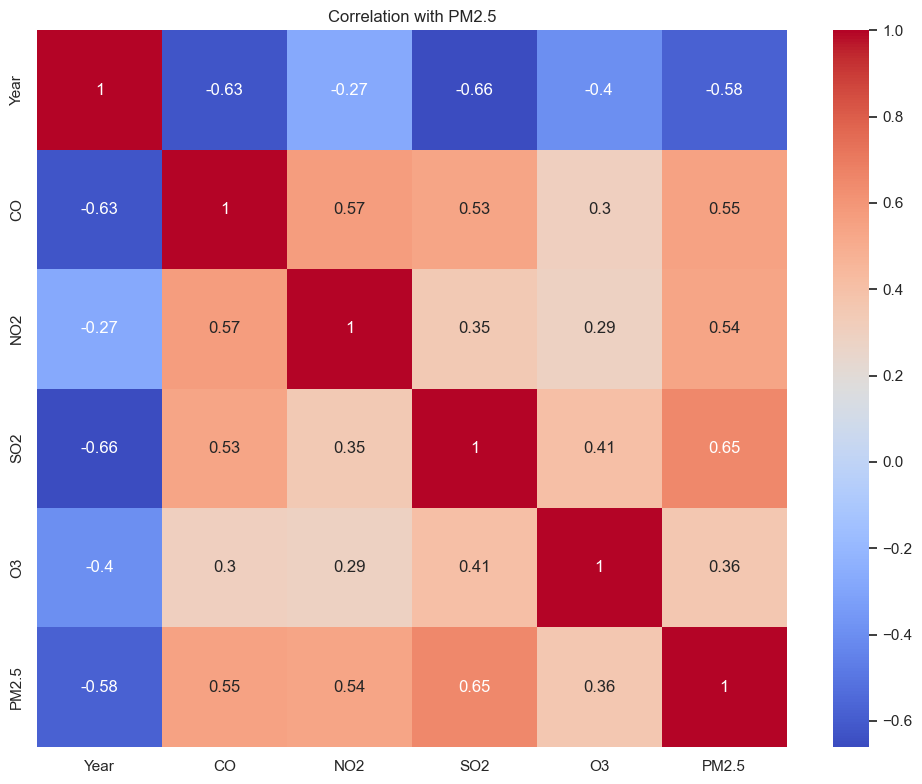

In [17]:
# Drop the 'State' column
corr_df = df.drop(columns=["State"])

# Calculate the correlation matrix for 'PM2.5' with all features
correlation_pm25 = corr_df.corrwith(df["PM2.5"])

# Create a correlation matrix for all features
correlation_matrix = corr_df.corr()

# Plot the correlation matrix with 'PM2.5' using a heatmap
plt.figure(figsize=(10, 8))
sn.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation with PM2.5")

plt.tight_layout()
plt.show()

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select the columns with numeric data for PCA
numeric_columns_scale = ["CO", "NO2", "O3", "SO2"]

# Standardize the data (mean=0, std=1) for PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[numeric_columns_scale])
# Apply PCA
pca = PCA()

pca_result = pca.fit_transform(data_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Print explained variance
for i, var in enumerate(explained_variance):
    print(f"Explained Variance for PC{i+1}: {var:.4f}")

# Plot explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")
plt.title("Explained Variance by Principal Component")
plt.show()

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
print(pca_result)

[[-1.63216567 -1.06625552  0.56302883 -0.73582978]
 [-1.31216212 -0.6157319   0.36630783 -0.56926563]
 [-2.6546092  -0.740455   -0.74242149  0.16515114]
 ...
 [ 2.35792416 -0.05214182  0.27043518  0.13072862]
 [ 1.4916743  -0.06484719  0.28380804 -0.2140483 ]
 [ 1.32671929 -0.9019347  -0.03039263 -0.43047724]]


In [19]:
# Apply PCA with 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_scaled)

# Create a DataFrame with the first 3 principal components
pca_df = pd.DataFrame(data=pca_result, columns=["PC1", "PC2", "PC3"])

# Add the 'Year' and 'State' columns back if needed
pca_df["Year"] = df["Year"]
pca_df["State"] = df["State"]
pca_df["PM2.5"] = df["PM2.5"]

# Print the DataFrame with the first 3 principal components
print(pca_df)

          PC1       PC2       PC3  Year          State     PM2.5
0   -1.632166 -1.066256  0.563029  2000        Alabama  2.712347
1   -1.312162 -0.615732  0.366308  2000       Arkansas  2.491300
2   -2.654609 -0.740455 -0.742421  2000        Arizona  2.001532
3   -2.148175  0.685029 -1.218686  2000     California  2.388467
4   -2.367333 -1.103787 -0.360892  2000       Colorado  1.705032
..        ...       ...       ...   ...            ...       ...
763  3.360324  0.415647 -0.248117  2015        Vermont  1.686292
764  2.411874  0.244212 -0.509862  2015     Washington  1.827739
765  2.357924 -0.052142  0.270435  2015      Wisconsin  1.963984
766  1.491674 -0.064847  0.283808  2015  West Virginia  2.025579
767  1.326719 -0.901935 -0.030393  2015        Wyoming  1.512608

[768 rows x 6 columns]


In [20]:
pca_df["Year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [21]:
from sklearn.model_selection import TimeSeriesSplit

# Create a TimeSeriesSplit with 2 splits
tscv = TimeSeriesSplit(n_splits=2)

for train_index, test_index in tscv.split(pca_df):
    train_data = pca_df.iloc[train_index]
    test_data = pca_df.iloc[test_index]

print(train_data)
print(test_data)

          PC1       PC2       PC3  Year          State     PM2.5
0   -1.632166 -1.066256  0.563029  2000        Alabama  2.712347
1   -1.312162 -0.615732  0.366308  2000       Arkansas  2.491300
2   -2.654609 -0.740455 -0.742421  2000        Arizona  2.001532
3   -2.148175  0.685029 -1.218686  2000     California  2.388467
4   -2.367333 -1.103787 -0.360892  2000       Colorado  1.705032
..        ...       ...       ...   ...            ...       ...
507  1.532559  0.530844  0.822919  2010  New Hampshire  1.751572
508 -1.084516 -0.450412 -0.171723  2010     New Jersey  2.207029
509 -0.160522 -0.462526 -0.314423  2010     New Mexico  1.490716
510 -0.637699 -0.740661 -0.694691  2010         Nevada  1.502047
511  0.254899  0.397445 -0.274704  2010       New York  2.037290

[512 rows x 6 columns]
          PC1       PC2       PC3  Year          State     PM2.5
512 -0.480961 -0.418519  0.735844  2010           Ohio  2.436982
513  0.649612 -0.066788 -0.199795  2010       Oklahoma  2.185926
5

In [22]:
# Filter train and test data based on the specified years
# train_data = train_data[train_data['Year'] <= 2012]
# test_data = test_data[(test_data['Year'] >= 2013) & (test_data['Year'] <= 2015)]

# Separate the independent variables (X) and the target variable (y)
X_train = train_data.drop(columns=["PM2.5"])
y_train = train_data["PM2.5"]

X_test = test_data.drop(columns=["PM2.5"])
y_test = test_data["PM2.5"]

In [23]:
X_train.shape

(512, 5)

In [24]:
X_test.shape

(256, 5)

In [25]:
X_train = pd.get_dummies(X_train, columns=["State"], prefix="State")
X_test = pd.get_dummies(X_test, columns=["State"], prefix="State")

In [26]:
X_train

,PC1,PC2,PC3,Year,State_Alabama,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,-1.632166,-1.066256,0.563029,2000,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-1.312162,-0.615732,0.366308,2000,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-2.654609,-0.740455,-0.742421,2000,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-2.148175,0.685029,-1.218686,2000,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-2.367333,-1.103787,-0.360892,2000,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,1.532559,0.530844,0.822919,2010,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
508,-1.084516,-0.450412,-0.171723,2010,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
509,-0.160522,-0.462526,-0.314423,2010,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
510,-0.637699,-0.740661,-0.694691,2010,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
X_test

,PC1,PC2,PC3,Year,State_Alabama,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
512,-0.480961,-0.418519,0.735844,2010,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
513,0.649612,-0.066788,-0.199795,2010,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
514,1.596549,1.221177,-0.421867,2010,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
515,-0.700529,-0.013706,0.361152,2010,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
516,-0.359253,0.346131,0.040925,2010,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,3.360324,0.415647,-0.248117,2015,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
764,2.411874,0.244212,-0.509862,2015,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
765,2.357924,-0.052142,0.270435,2015,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
766,1.491674,-0.064847,0.283808,2015,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## Model Building


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mean_squared_error(pred, y_test))
print("r2score=", r2)
print("Mean absolute error = ", mae)
print("Mean Squared error = ", mse)
print("Root Mean Sqaured Error= ", rmse)

r2score= 0.850550401059748
Mean absolute error =  0.06577882873064844
Mean Squared error =  0.006736894997339721
Root Mean Sqaured Error=  0.08207859037130036


In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
cv_score = cross_val_score(lr, x, y, cv=5)
cv_mean = cv_score.mean()
cv_mean

NameError: name 'x' is not defined

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
pred = dtr.predict(X_test)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mean_squared_error(pred, y_test))
print("r2score=", r2)
print("Mean absolute error = ", mae)
print("Mean Squared error = ", mse)
print("Root Mean Sqaured Error= ", rmse)

r2score= -0.20727591916996757
Mean absolute error =  0.1777875725655494
Mean Squared error =  0.0544216321618665
Root Mean Sqaured Error=  0.233284444749037


In [ ]:
cv_score = cross_val_score(dtr, x, y, cv=5)
cv_mean = cv_score.mean()
cv_mean

0.27251689650707733

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, random_state=12)
rfr.fit(X_train, y_train)
pred = rfr.predict(X_test)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mean_squared_error(pred, y_test))
print("r2score=", r2)
print("Mean absolute error = ", mae)
print("Mean Squared error = ", mse)
print("Root Mean Sqaured Error= ", rmse)

r2score= 0.1486855823831741
Mean absolute error =  0.1502769227208865
Mean Squared error =  0.038375585360378495
Root Mean Sqaured Error=  0.19589687429966435


In [ ]:
cv_score = cross_val_score(rfr, x, y, cv=5)
cv_mean = cv_score.mean()
cv_mean

0.6194251187844066

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, random_state=0)
lasso.fit(X_train, y_train)
pred = lasso.predict(X_test)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mean_squared_error(pred, y_test))
print("r2score=", r2)
print("Mean absolute error = ", mae)
print("Mean Squared error = ", mse)
print("Root Mean Sqaured Error= ", rmse)

r2score= -0.42247876616765523
Mean absolute error =  0.18750693280562702
Mean Squared error =  0.0641225547045332
Root Mean Sqaured Error=  0.25322431696923026


In [ ]:
cv_score = cross_val_score(lasso, x, y, cv=5)
cv_mean = cv_score.mean()
cv_mean

-0.055658709362409645

In [ ]:
 from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train, y_train)
pred = rfr.predict(X_test)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mean_squared_error(pred, y_test))
print("r2score=", r2)
print("Mean absolute error = ", mae)
print("Mean Squared error = ", mse)
print("Root Mean Sqaured Error= ", rmse)

r2score= -0.10864056357450647
Mean absolute error =  0.167251497028766
Mean Squared error =  0.045416480465856085
Root Mean Sqaured Error=  0.21311142734695407


In [ ]:
cv_score = cross_val_score(knr, x, y, cv=5)
cv_mean = cv_score.mean()
cv_mean

0.32228921929688986

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.001, random_state=0)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(pred, y_test)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mean_squared_error(pred, y_test))
print("r2score=", r2)
print("Mean absolute error = ", mae)
print("Mean Squared error = ", mse)
print("Root Mean Sqaured Error= ", rmse)

r2score= 0.832067101171921
Mean absolute error =  0.0656245393173197
Mean Squared error =  0.006879525672963952
Root Mean Sqaured Error=  0.08294290610392158


In [ ]:
cv_score = cross_val_score(ridge, x, y, cv=3)
cv_mean = cv_score.mean()
cv_mean

0.8921247506961453

Cosidering the difference between R2 score and cv mean score we get minimum difference with the Linear Regression model.
So we will consider that as the best model.


<b>Hyper parameter Tuning<b>


In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
parameter = {
    "fit_intercept": [True, False],
    "n_jobs": [42, -1, -10, 1, 10, 100, 200, 500, 35, 25],
}

In [33]:
GCV = GridSearchCV(LinearRegression(), parameter, cv=5)

In [34]:
GCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'n_jobs': [42, -1, -10, 1, 10, 100, 200, 500, 35, 25]})

In [35]:
GCV.best_params_

{'fit_intercept': False, 'n_jobs': 42}

In [37]:
Final_mod = LinearRegression(fit_intercept=False, n_jobs=42)
Final_mod.fit(X_train, y_train)
pred = Final_mod.predict(X_test)
r2 = r2_score(y_test, pred)
cv_score = cross_val_score(Final_mod, X_train, y_train, cv=5)
cv_mean = cv_score.mean()
print(r2, cv_mean)

0.8505504010594696 0.9104432489131888


## Serialization


In [38]:
# Saving the model
import joblib

joblib.dump(Final_mod, "PM2.5predictor.pkl")

['PM2.5predictor.pkl']